In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Votes\\FinalCsvFiles\\Votes_2017_2020.csv"

In [4]:
data=pd.read_csv(input_path,names=["RowId","CreateDate","PostId","VoteType","UserId"])
data.head()

,RowId,CreateDate,PostId,VoteType,UserId
0,129325273,2017-01-01T00:00:00.000,2173777,2,-1
1,129325274,2017-01-01T00:00:00.000,33568015,2,-1
2,129325276,2017-01-01T00:00:00.000,11681331,2,-1
3,129325277,2017-01-01T00:00:00.000,25398100,2,-1
4,129325278,2017-01-01T00:00:00.000,41412391,2,-1


In [5]:
len(data)

86404248

In [8]:
data[(data["VoteType"]==1 )].head()

,RowId,CreateDate,PostId,VoteType,UserId
7,129325281,2017-01-01T00:00:00.000,40734242,1,-1
57,129325340,2017-01-01T00:00:00.000,41403488,1,-1
60,129325343,2017-01-01T00:00:00.000,41399400,1,-1
129,129325416,2017-01-01T00:00:00.000,41359143,1,-1
195,129325486,2017-01-01T00:00:00.000,41398460,1,-1


In [9]:
data_type_filtered=data[(data["VoteType"]==1 ) | (data["VoteType"]==2 ) | 
                        (data["VoteType"]==3 ) | (data["VoteType"]==5 ) ]
len(data_type_filtered)

80563761

In [13]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
    print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
    print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
    print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
    print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
    print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
    print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [14]:
yearly_monthly_votes=getYearlyMonthlyCreation(data)

       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017
       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017
       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth
0  129325273 2017-01-01   2173777         2      -1        2017            1
1  129325274 2017-01-01  33568015         2      -1        2017            1
2

In [24]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

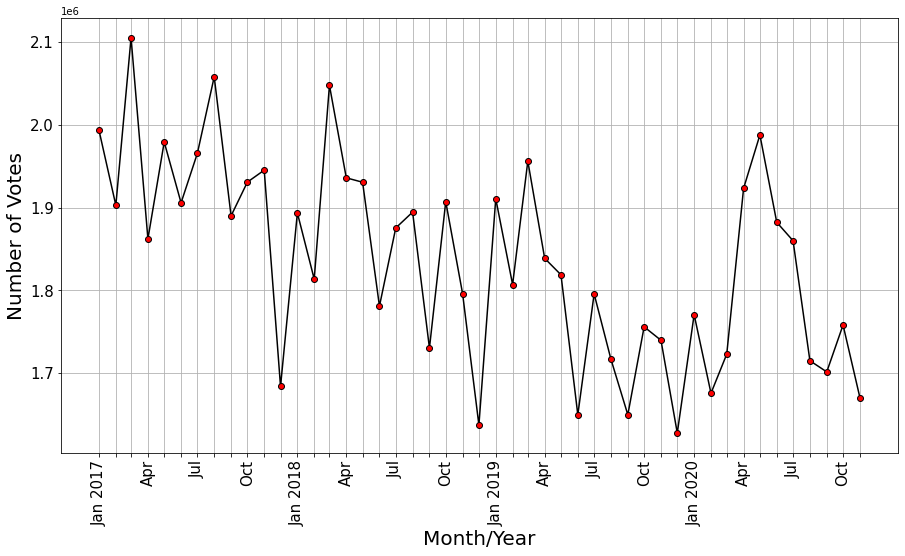

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_votes['CreateYearMonth'],yearly_monthly_votes['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_votes['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Number of Votes',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_VoteCreationYearltMonthly.pdf',bbox_inches='tight')

# yearly_monthly_votes.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Vote Creations')

In [21]:
yearly_monthly_votes_filtered=getYearlyMonthlyCreation(data_type_filtered)
len(yearly_monthly_votes_filtered)

<ipython-input-13-f6dbea666cff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateDate"] = pd.to_datetime(data["CreateDate"])


       RowId CreateDate    PostId  VoteType  UserId
0  129325273 2017-01-01   2173777         2      -1
1  129325274 2017-01-01  33568015         2      -1
2  129325276 2017-01-01  11681331         2      -1
3  129325277 2017-01-01  25398100         2      -1
4  129325278 2017-01-01  41412391         2      -1


<ipython-input-13-f6dbea666cff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)


       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017


<ipython-input-13-f6dbea666cff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)


       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth
0  129325273 2017-01-01   2173777         2      -1        2017            1
1  129325274 2017-01-01  33568015         2      -1        2017            1
2  129325276 2017-01-01  11681331         2      -1        2017            1
3  129325277 2017-01-01  25398100         2      -1        2017            1
4  129325278 2017-01-01  41412391         2      -1        2017            1


<ipython-input-13-f6dbea666cff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)


       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth  \
0  129325273 2017-01-01   2173777         2      -1        2017            1   
1  129325274 2017-01-01  33568015         2      -1        2017            1   
2  129325276 2017-01-01  11681331         2      -1        2017            1   
3  129325277 2017-01-01  25398100         2      -1        2017            1   
4  129325278 2017-01-01  41412391         2      -1        2017            1   

  CreateYearMonth  
0          2017-1  
1          2017-1  
2          2017-1  
3          2017-1  
4          2017-1  


<ipython-input-13-f6dbea666cff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])


       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth  \
0  129325273 2017-01-01   2173777         2      -1        2017            1   
1  129325274 2017-01-01  33568015         2      -1        2017            1   
2  129325276 2017-01-01  11681331         2      -1        2017            1   
3  129325277 2017-01-01  25398100         2      -1        2017            1   
4  129325278 2017-01-01  41412391         2      -1        2017            1   

  CreateYearMonth  
0      2017-01-01  
1      2017-01-01  
2      2017-01-01  
3      2017-01-01  
4      2017-01-01  
       RowId CreateYearMonth
0  129325273      2017-01-01
1  129325274      2017-01-01
2  129325276      2017-01-01
3  129325277      2017-01-01
4  129325278      2017-01-01


47

Text(0, 0.5, 'Vote Creations')

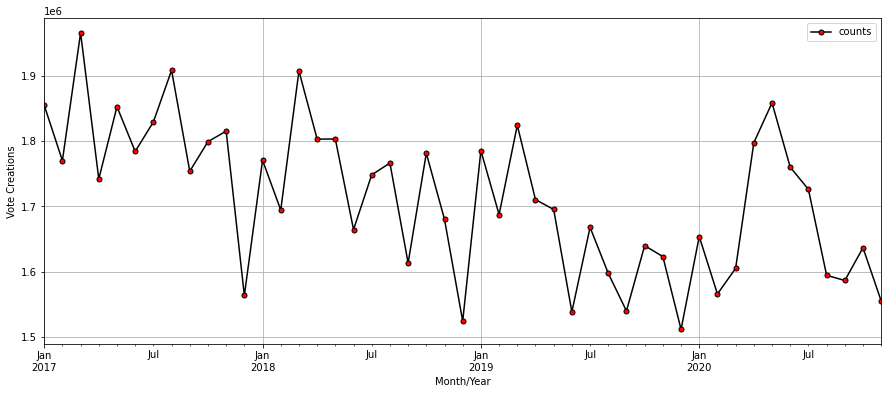

In [22]:
yearly_monthly_votes_filtered.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Vote Creations')

In [16]:
data.head()

,RowId,CreateDate,PostId,VoteType,UserId,CreateYear,CreateMonth,CreateYearMonth
0,129325273,2017-01-01,2173777,2,-1,2017,1,2017-01-01
1,129325274,2017-01-01,33568015,2,-1,2017,1,2017-01-01
2,129325276,2017-01-01,11681331,2,-1,2017,1,2017-01-01
3,129325277,2017-01-01,25398100,2,-1,2017,1,2017-01-01
4,129325278,2017-01-01,41412391,2,-1,2017,1,2017-01-01


In [17]:
data_2017=data[data["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

23223687

In [18]:
data_2018=data[data["CreateYear"]==2018]
len(data_2018)

22244375

In [19]:
data_2019=data[data["CreateYear"]==2019]
len(data_2019)

21267514

In [20]:
data_2020=data[data["CreateYear"]==2020]
len(data_2020)

19668672